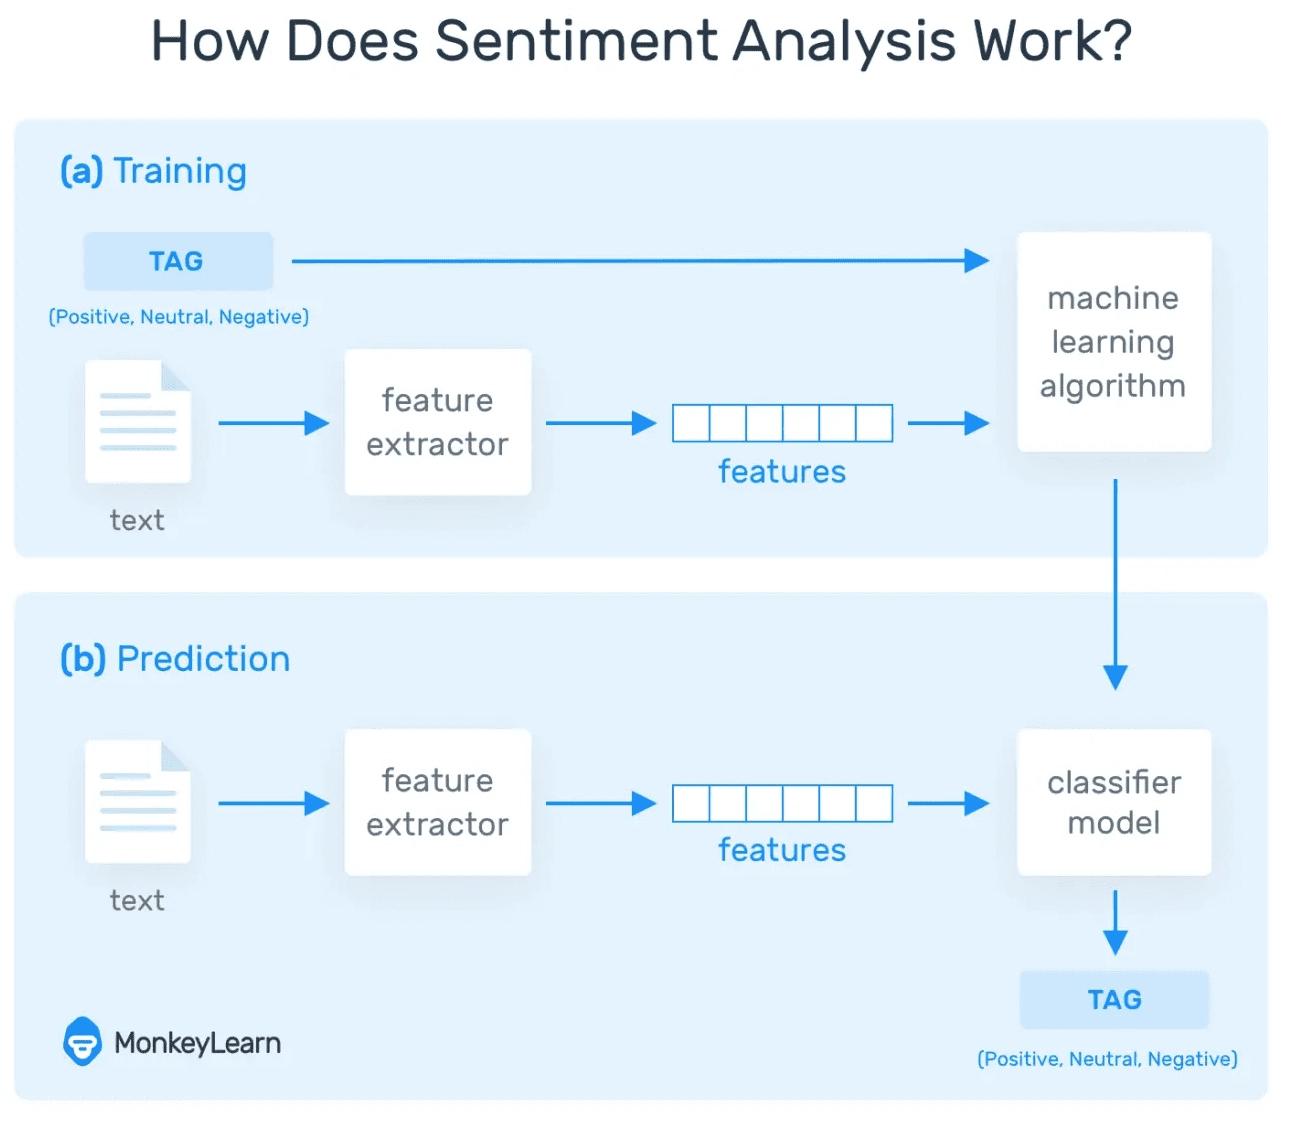

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [24]:
df = pd.read_csv("Language Detection.csv")

In [25]:
df.head(12)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
# Value count of each language
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [27]:
X = df['Text']
y = df['Language']

### Label Encoding
Converting categorical variables to numerical

In [28]:
# pip install scikit-learn

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(y, f)

In [31]:
y

array([3, 3, 3, ..., 9, 9, 9], shape=(10337,))

In [32]:
y[1525]

np.int64(10)

### Text Processing

In [33]:
import re     # regular expression
df_list = []
for Text in X:
    Text = re.sub(r'[!@#$(),\n"%^&*:;~0-9]', ' ',Text)
    Text = re.sub('[[]]',' ',Text)
    Text = Text.lower()
    df_list.append(Text)

/var/folders/kv/02xnk4yx4q94gr1r59m8rd140000gn/T/ipykernel_32780/3805029625.py:5: FutureWarning: Possible nested set at position 1
  Text = re.sub('[[]]',' ',Text)


### Vectorization

In [34]:
# Creating countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_list).toarray()

In [35]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10337, 39404))

In [36]:
# Save the CountVectorizer to a file
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [37]:
X.shape

(10337, 39404)

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

### Model creation and Prediction

In [39]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [40]:
# Prediction
y_pred = model.predict(x_test)

In [41]:
#Save the model
import pickle

with open('model1.pkl','wb') as file:
  pickle.dump(model,file)


### Build Model

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [43]:
print("Accuracy is :",ac)

Accuracy is : 0.9777562862669246


In [44]:
accuracy_score(y_test,y_pred)

0.9777562862669246

In [45]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      0.92      0.95        79
           2       1.00      0.98      0.99       109
           3       0.90      1.00      0.95       266
           4       1.00      0.99      0.99       214
           5       0.99      0.95      0.97       110
           6       1.00      0.99      0.99        76
           7       1.00      0.93      0.97        15
           8       0.99      0.98      0.99       142
           9       0.99      0.94      0.96        80
          10       0.97      1.00      0.99       114
          11       0.99      0.99      0.99       142
          12       1.00      0.96      0.98       150
          13       0.99      0.97      0.98       168
          14       0.96      0.98      0.97       120
          15       1.00      0.98      0.99       101
          16       1.00      0.97      0.99        76

    accuracy              

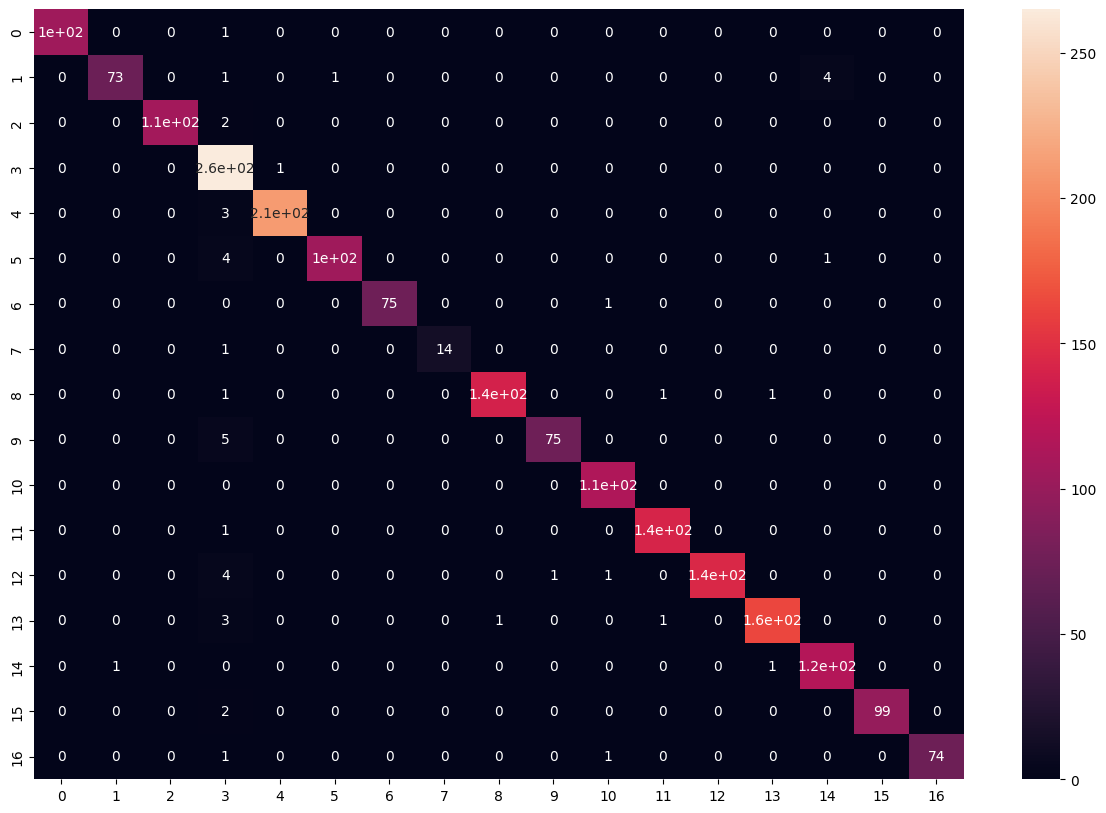

In [46]:
# visualising the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot = True)
plt.show()

### Prediction

In [47]:
with open('model1.pkl','rb') as file:
  model_new=pickle.load(file)

In [52]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model_new.predict(data)
print(output)

[10]


In [53]:
lang = le.inverse_transform([output]) # finding the language corresponding the the predicted value
print("The langauge is in",lang[0]) # printing the language

The langauge is in Malayalam


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)